<a href="https://colab.research.google.com/github/ktoyesh04/Sparks-Data-Science-Internship/blob/main/PredictionUsingUnsupervisedAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kurapati Toyesh

# Sparks Internship Task: Prediction using Unsupervised Learning

- Fron the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.
- [Dataset](https://bit.ly/3kXTdox)
- [Sample Solution](https://bit.ly/3cGyP8j)

In [1]:
# Importing necessary packages
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load the data set
df = pd.read_csv('iris_.csv',index_col=0)

## Exploratory Data Analysis

In [3]:
# Display the first few rows of the dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking data types and null values of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
# Displaying descriptive statistics of columns
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Preprocessing

### Duplicates

In [6]:
# Checking for duplicates
df.duplicated().sum()

3

In [7]:
# Removing duplicates
df_cleaned = df.drop_duplicates()

### Standardization (Optional)

In [8]:
# Encoding categorical variable and standardizing numerical features
label_encoder = LabelEncoder()
df_cleaned['Species'] = label_encoder.fit_transform(df_cleaned['Species'])

scaler = StandardScaler()
df_cleaned[df_cleaned.columns[:-1]] = scaler.fit_transform(df_cleaned[df_cleaned.columns[:-1]])


<ipython-input-8-cf5ef3452a76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Species'] = label_encoder.fit_transform(df_cleaned['Species'])
<ipython-input-8-cf5ef3452a76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[df_cleaned.columns[:-1]] = scaler.fit_transform(df_cleaned[df_cleaned.columns[:-1]])


### Outlier Detection

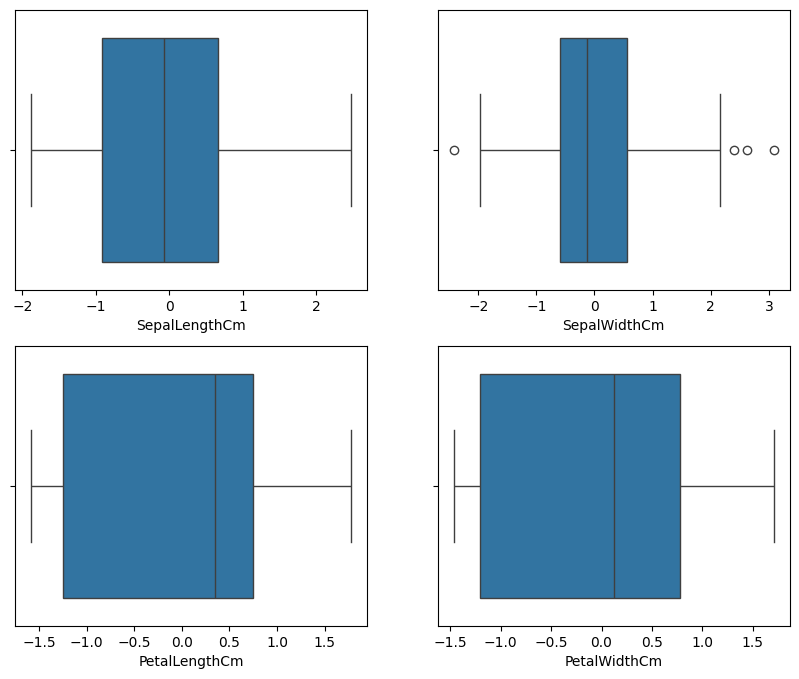

In [9]:
# Box plot for outlier detection
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, feature in enumerate(df_cleaned.columns[:-1]):
    sns.boxplot(x=df_cleaned[feature], ax=axs[i//2, i%2])
plt.show()

In [10]:
# Z-score method to remove outliers
z_scores = stats.zscore(df_cleaned[df_cleaned.columns[:-1]])
abs_z_scores = np.abs(z_scores)
filtered = (abs_z_scores < 3).all(axis=1)
df_cleaned = df_cleaned[filtered]

In [11]:
# Inter quantile method to remove outliers
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

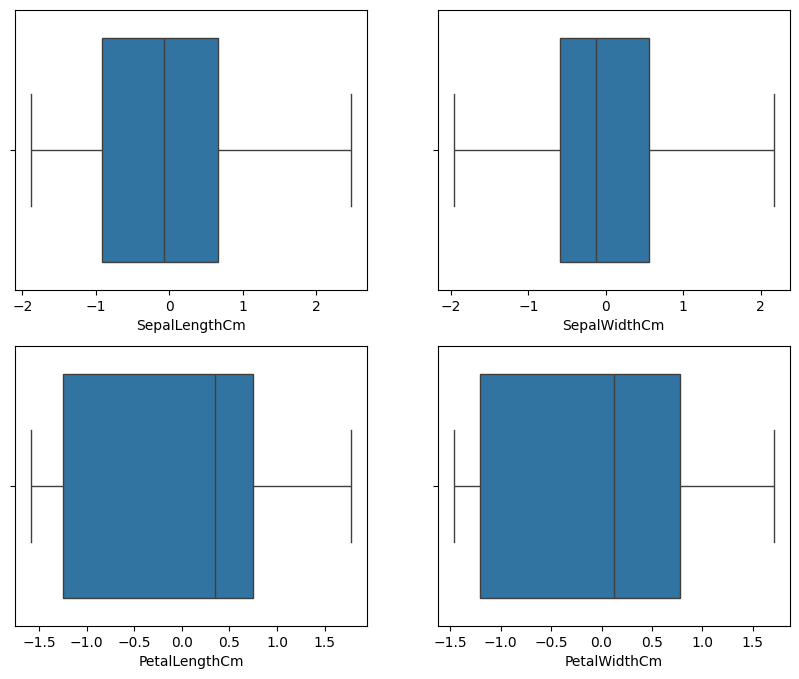

In [12]:
# Box plot for confirming outlier removal
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, feature in enumerate(df_cleaned.columns[:-1]):
    sns.boxplot(x=df_cleaned[feature], ax=axs[i//2, i%2])

plt.show()

## KMeans Clustering

### Elbow Method for Optimal Number of Clusters

In [13]:
X = df_cleaned[df_cleaned.columns[:-1]]

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=24, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

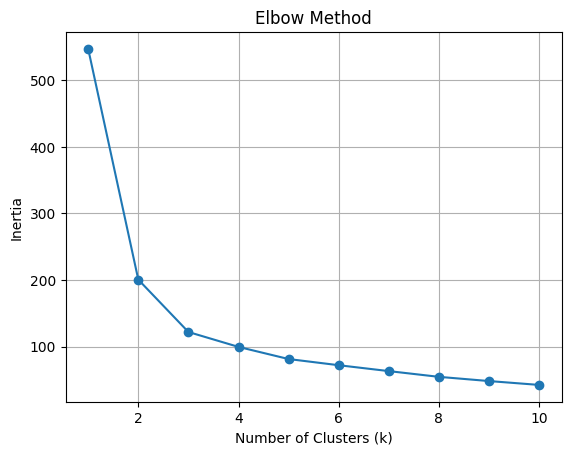

In [14]:
# Plotting elbow method results
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

### Clustering

In [15]:
# Clustering using KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=24, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(X)

In [16]:
# Mapping cluster numbers to species names
species = df_cleaned['Species'].unique()
cluster_names = {0: species[0], 1: species[1], 2: species[2]}
df_cleaned['Cluster_Name'] = df_cleaned['Cluster'].map(cluster_names)

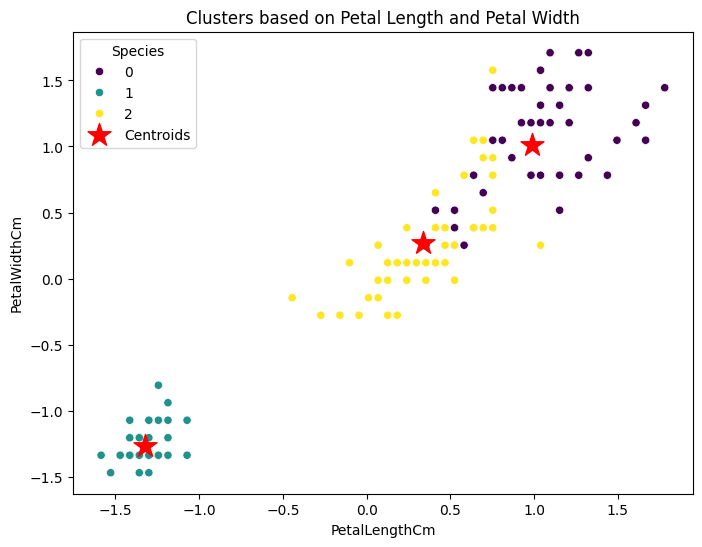

In [17]:
# Visualizing clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df_cleaned, hue='Cluster_Name', palette='viridis')
plt.title('Clusters based on Petal Length and Petal Width')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='*', label='Centroids')
plt.legend(title='Species')
plt.show()

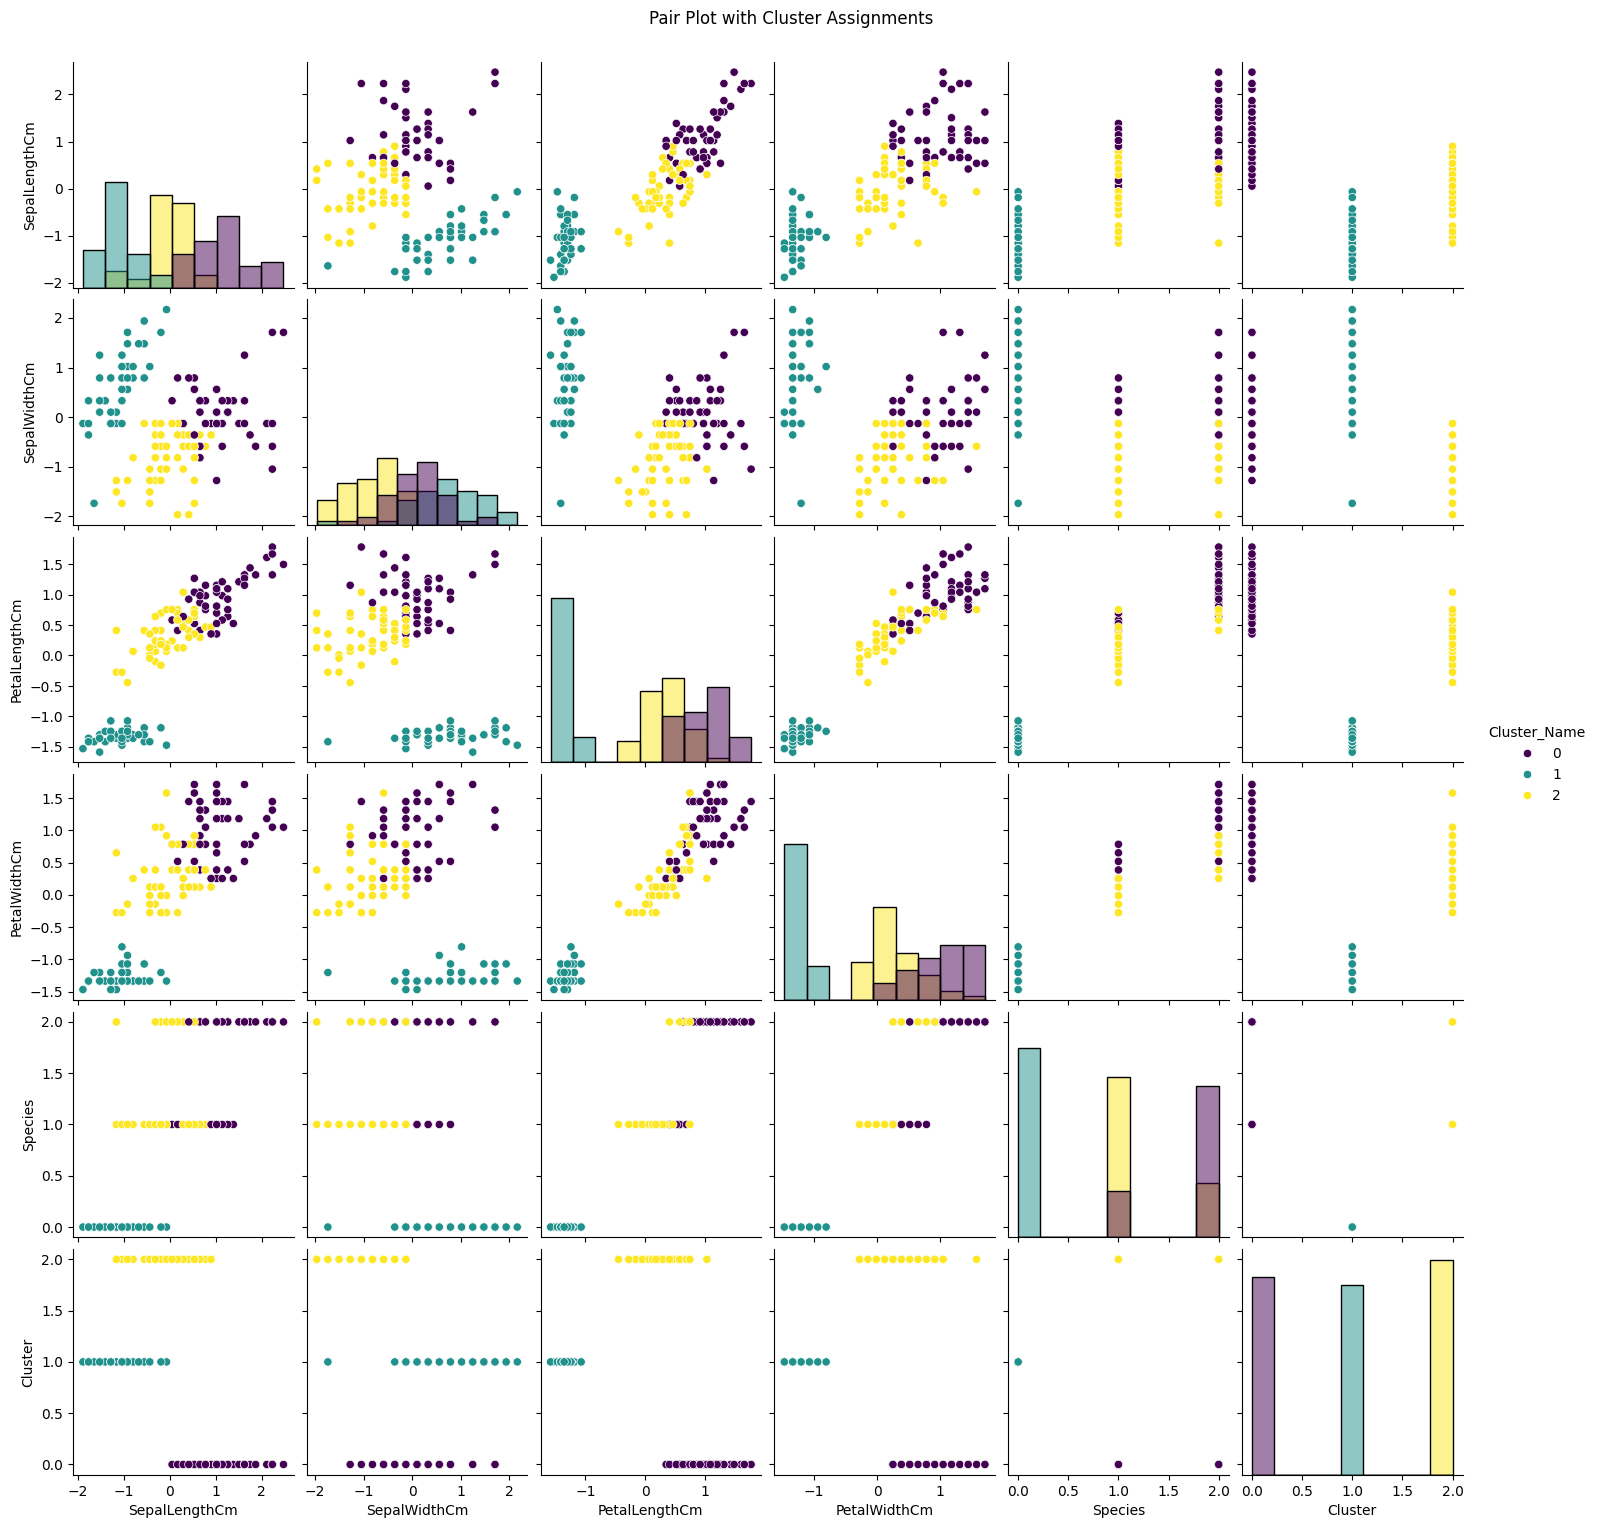

In [18]:
# Pair plot with cluster assignments
sns.pairplot(df_cleaned, hue='Cluster_Name', palette='viridis', diag_kind='hist')
plt.suptitle('Pair Plot with Cluster Assignments', y=1.02)
plt.show()